In [99]:
%pip install torch

Note: you may need to restart the kernel to use updated packages.


In [100]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
import pandas as pd

# Supongamos que ya tienes tus datos en un DataFrame de pandas llamado 'data'
data = pd.read_csv('data.csv', encoding='ISO-8859-1')  # También puedes probar 'latin1' o 'windows-1252'


In [101]:
data.head()

,Dia,Hora,Latitud Central,Longitud Central,Tipo de Via,Congestion
0,Thursday,12:23,-12.076697,-77.093074,Avenida Luis Banchero Rossi,unknown
1,Thursday,12:23,-12.076872,-77.093217,Avenida Rafael Escardó,low
2,Thursday,12:23,-12.076697,-77.093074,Avenida Luis Banchero Rossi,unknown
3,Thursday,12:23,-12.076907,-77.092505,Avenida Luis Banchero Rossi,unknown
4,Thursday,12:23,-12.076104,-77.092747,Avenida Rafael Escardó,low


In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18888 entries, 0 to 18887
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dia               18888 non-null  object 
 1   Hora              18888 non-null  object 
 2   Latitud Central   18888 non-null  float64
 3   Longitud Central  18888 non-null  float64
 4   Tipo de Via       18856 non-null  object 
 5   Congestion        18888 non-null  object 
dtypes: float64(2), object(4)
memory usage: 885.5+ KB


In [103]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Latitud Central,18888.0,-12.113665,0.041641,-12.224182,-12.129833,-12.101355,-12.082660,-12.055756
Longitud Central,18888.0,-77.024915,0.031524,-77.110631,-77.044190,-77.019905,-77.002255,-76.956702


In [104]:
from sklearn.preprocessing import LabelEncoder

# Convertir el día a valores numéricos (label encoding)
label_encoder = LabelEncoder()
data['Dia'] = label_encoder.fit_transform(data['Dia'])
data.head()

,Dia,Hora,Latitud Central,Longitud Central,Tipo de Via,Congestion
0,0,12:23,-12.076697,-77.093074,Avenida Luis Banchero Rossi,unknown
1,0,12:23,-12.076872,-77.093217,Avenida Rafael Escardó,low
2,0,12:23,-12.076697,-77.093074,Avenida Luis Banchero Rossi,unknown
3,0,12:23,-12.076907,-77.092505,Avenida Luis Banchero Rossi,unknown
4,0,12:23,-12.076104,-77.092747,Avenida Rafael Escardó,low


In [105]:
# Convertir la hora a minutos totales desde medianoche
data['Hora'] = pd.to_datetime(data['Hora'], format='%H:%M').dt.hour * 60 + pd.to_datetime(data['Hora'], format='%H:%M').dt.minute
data.head()

,Dia,Hora,Latitud Central,Longitud Central,Tipo de Via,Congestion
0,0,743,-12.076697,-77.093074,Avenida Luis Banchero Rossi,unknown
1,0,743,-12.076872,-77.093217,Avenida Rafael Escardó,low
2,0,743,-12.076697,-77.093074,Avenida Luis Banchero Rossi,unknown
3,0,743,-12.076907,-77.092505,Avenida Luis Banchero Rossi,unknown
4,0,743,-12.076104,-77.092747,Avenida Rafael Escardó,low


In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18888 entries, 0 to 18887
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dia               18888 non-null  int32  
 1   Hora              18888 non-null  int32  
 2   Latitud Central   18888 non-null  float64
 3   Longitud Central  18888 non-null  float64
 4   Tipo de Via       18856 non-null  object 
 5   Congestion        18888 non-null  object 
dtypes: float64(2), int32(2), object(2)
memory usage: 737.9+ KB


In [107]:
congestion_mapping = {
    'unknown': 0,
    'low': 1,
    'moderate': 2,
    'heavy': 3,
    'severe': 4
}

# Aplicar el mapeo a la columna 'Congestion'
data['Congestion'] = data['Congestion'].map(congestion_mapping)

# Verificar los cambios
print(data.head())

   Dia  Hora  Latitud Central  Longitud Central                  Tipo de Via  \
0    0   743       -12.076697        -77.093074  Avenida Luis Banchero Rossi   
1    0   743       -12.076872        -77.093217       Avenida Rafael Escardó   
2    0   743       -12.076697        -77.093074  Avenida Luis Banchero Rossi   
3    0   743       -12.076907        -77.092505  Avenida Luis Banchero Rossi   
4    0   743       -12.076104        -77.092747       Avenida Rafael Escardó   

   Congestion  
0           0  
1           1  
2           0  
3           0  
4           1  


In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18888 entries, 0 to 18887
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dia               18888 non-null  int32  
 1   Hora              18888 non-null  int32  
 2   Latitud Central   18888 non-null  float64
 3   Longitud Central  18888 non-null  float64
 4   Tipo de Via       18856 non-null  object 
 5   Congestion        18888 non-null  int64  
dtypes: float64(2), int32(2), int64(1), object(1)
memory usage: 737.9+ KB


In [110]:

X = data[['Dia','Hora','Latitud Central','Longitud Central','Tipo de Via']]
y = data['Congestion']

X = pd.get_dummies(X, columns=['Tipo de Via'])  

In [111]:
X.sample()

,Dia,Hora,Latitud Central,Longitud Central,Tipo de Via_29 de Diciembre,Tipo de Via_Acceso Sur Jockey Plaza,Tipo de Via_Auxiliar Avenida Angamos Este,Tipo de Via_Auxiliar Avenida Circunvalación,Tipo de Via_Auxiliar Avenida Nicolás Arriola,Tipo de Via_Avenida 12,...,Tipo de Via_Villa Militar Oeste,Tipo de Via_Villa Militar de Pueblo Libre,Tipo de Via_Villa Venturo,Tipo de Via_Vía Central,Tipo de Via_Vía Expresa Luis Fernán Bedoya Reyes,Tipo de Via_Vía Principal,Tipo de Via_Vía Real,Tipo de Via_Vía de Evitamiento,Tipo de Via_Óvalo Los Cabitos,Tipo de Via_Óvalo de Arriola
1337,0,763,-12.093099,-77.053291,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [112]:
X.replace({True: 1, False: 0}, inplace=True)

print(X.head())

C:\Users\Ibrahim\AppData\Local\Temp\ipykernel_7136\3155676055.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X.replace({True: 1, False: 0}, inplace=True)


   Dia  Hora  Latitud Central  Longitud Central  Tipo de Via_29 de Diciembre  \
0    0   743       -12.076697        -77.093074                            0   
1    0   743       -12.076872        -77.093217                            0   
2    0   743       -12.076697        -77.093074                            0   
3    0   743       -12.076907        -77.092505                            0   
4    0   743       -12.076104        -77.092747                            0   

   Tipo de Via_Acceso Sur Jockey Plaza  \
0                                    0   
1                                    0   
2                                    0   
3                                    0   
4                                    0   

   Tipo de Via_Auxiliar Avenida Angamos Este  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                         

In [113]:
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)


X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)  # Cambiar a forma (n, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)  # Cambiar a forma (n, 1)

class TrafficCongestionModel(nn.Module):
    def __init__(self):
        super(TrafficCongestionModel, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 64)  # Capa oculta con 64 neuronas
        self.fc2 = nn.Linear(64, 64)  # Capa oculta con 64 neuronas
        self.fc3 = nn.Linear(64, 1)  # Capa de salida

    def forward(self, x):
        x = torch.relu(self.fc1(x))  # Aplicar ReLU en la primera capa
        x = torch.relu(self.fc2(x))  # Aplicar ReLU en la segunda capa
        x = self.fc3(x)  # Sin activación en la capa de salida (regresión)
        return x

# Definir el modelo
model = TrafficCongestionModel()

# Definir el criterio de pérdida y el optimizador
learning_rate = 0.0005  # Hiperparámetro
loss_fn = nn.MSELoss()  # Pérdida de error cuadrático medio
optimizer = optim.Adam(model.parameters(), lr=learning_rate)  # Optimizador Adam

num_epochs = 1000  
for epoch in range(num_epochs):
    model.train() 
    optimizer.zero_grad() 
    
    y_pred = model(X_train_tensor)
    
    loss = loss_fn(y_pred, y_train_tensor)
    
    loss.backward()  
    optimizer.step()  

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

model.eval()  
with torch.no_grad():  
    y_test_pred = model(X_test_tensor)  
    test_loss = loss_fn(y_test_pred, y_test_tensor)  
    print(f'Test Loss: {test_loss.item():.4f}')


Epoch [10/1000], Loss: 0.5541
Epoch [20/1000], Loss: 0.3341
Epoch [30/1000], Loss: 0.1963
Epoch [40/1000], Loss: 0.1366
Epoch [50/1000], Loss: 0.1147
Epoch [60/1000], Loss: 0.1085
Epoch [70/1000], Loss: 0.1059
Epoch [80/1000], Loss: 0.1051
Epoch [90/1000], Loss: 0.1048
Epoch [100/1000], Loss: 0.1047
Epoch [110/1000], Loss: 0.1046
Epoch [120/1000], Loss: 0.1046
Epoch [130/1000], Loss: 0.1045
Epoch [140/1000], Loss: 0.1045
Epoch [150/1000], Loss: 0.1045
Epoch [160/1000], Loss: 0.1044
Epoch [170/1000], Loss: 0.1044
Epoch [180/1000], Loss: 0.1044
Epoch [190/1000], Loss: 0.1043
Epoch [200/1000], Loss: 0.1043
Epoch [210/1000], Loss: 0.1043
Epoch [220/1000], Loss: 0.1042
Epoch [230/1000], Loss: 0.1042
Epoch [240/1000], Loss: 0.1041
Epoch [250/1000], Loss: 0.1041
Epoch [260/1000], Loss: 0.1041
Epoch [270/1000], Loss: 0.1040
Epoch [280/1000], Loss: 0.1040
Epoch [290/1000], Loss: 0.1039
Epoch [300/1000], Loss: 0.1038
Epoch [310/1000], Loss: 0.1038
Epoch [320/1000], Loss: 0.1037
Epoch [330/1000],

Training with learning rate: 0.1
Training with learning rate: 0.01
Training with learning rate: 0.001
Training with learning rate: 0.0001


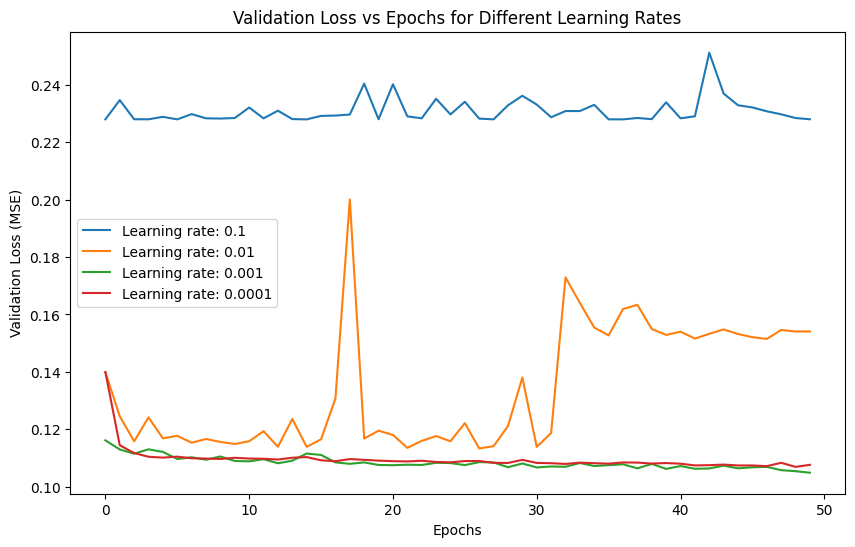

In [114]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# Ejemplo de red neuronal
class TrafficCongestionModel(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(TrafficCongestionModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        out = self.relu(self.fc1(x))
        out = self.relu(self.fc2(out))
        out = self.fc3(out)
        return out

# Función de entrenamiento
def train_model(learning_rate, train_loader, val_loader, input_size, hidden_size, epochs=50):
    model = TrafficCongestionModel(input_size, hidden_size)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    
    train_losses = []
    val_losses = []

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        train_losses.append(running_loss / len(train_loader))
        
        # Evaluación en validación
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for inputs, targets in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                val_loss += loss.item()

        val_losses.append(val_loss / len(val_loader))

    return model, train_losses, val_losses


train_data = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)

val_data = TensorDataset(X_test_tensor, y_test_tensor)
val_loader = DataLoader(val_data, batch_size=32)

# Entrenamiento con diferentes tasas de aprendizaje
results = {}
input_size = X_train.shape[1]
hidden_size = 64
learning_rates = [1e-1, 1e-2, 1e-3, 1e-4]

for lr in learning_rates:
    print(f"Training with learning rate: {lr}")
    model, train_losses, val_losses = train_model(lr, train_loader, val_loader, input_size, hidden_size)
    results[lr] = (train_losses, val_losses)

# Graficar las pérdidas de validación para cada tasa de aprendizaje
plt.figure(figsize=(10, 6))
for lr, (train_losses, val_losses) in results.items():
    plt.plot(val_losses, label=f"Learning rate: {lr}")
plt.title('Validation Loss vs Epochs for Different Learning Rates')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss (MSE)')
plt.legend()
plt.show()


Epoch [1/50], Train Loss: 0.1459, Val Loss: 0.1165
Epoch [2/50], Train Loss: 0.1149, Val Loss: 0.1156
Epoch [3/50], Train Loss: 0.1131, Val Loss: 0.1130
Epoch [4/50], Train Loss: 0.1110, Val Loss: 0.1135
Epoch [5/50], Train Loss: 0.1099, Val Loss: 0.1110
Epoch [6/50], Train Loss: 0.1090, Val Loss: 0.1120
Epoch [7/50], Train Loss: 0.1087, Val Loss: 0.1105
Epoch [8/50], Train Loss: 0.1080, Val Loss: 0.1104
Epoch [9/50], Train Loss: 0.1074, Val Loss: 0.1099
Epoch [10/50], Train Loss: 0.1074, Val Loss: 0.1104
Epoch [11/50], Train Loss: 0.1068, Val Loss: 0.1106
Epoch [12/50], Train Loss: 0.1066, Val Loss: 0.1098
Epoch [13/50], Train Loss: 0.1057, Val Loss: 0.1084
Epoch [14/50], Train Loss: 0.1055, Val Loss: 0.1097
Epoch [15/50], Train Loss: 0.1051, Val Loss: 0.1086
Epoch [16/50], Train Loss: 0.1049, Val Loss: 0.1086
Epoch [17/50], Train Loss: 0.1050, Val Loss: 0.1084
Epoch [18/50], Train Loss: 0.1043, Val Loss: 0.1075
Epoch [19/50], Train Loss: 0.1047, Val Loss: 0.1092
Epoch [20/50], Train 

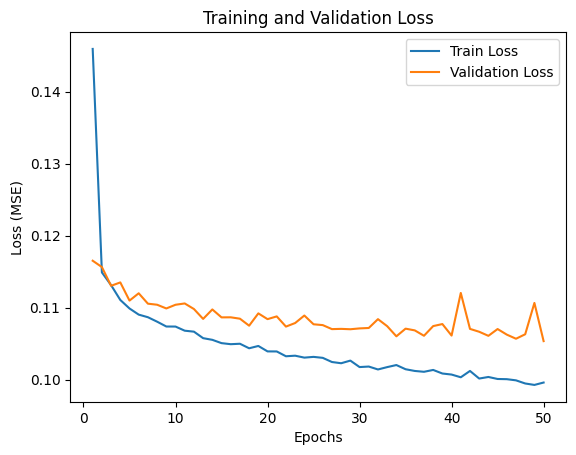

In [115]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

class TrafficCongestionModel(nn.Module):
    def __init__(self):
        super(TrafficCongestionModel, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 64)  
        self.fc2 = nn.Linear(64, 64)  
        self.fc3 = nn.Linear(64, 1)  

    def forward(self, x):
        x = torch.relu(self.fc1(x))  # ReLU en la primera capa
        x = torch.relu(self.fc2(x))  # ReLU en la segunda capa
        x = self.fc3(x)  # Sin activación en la capa de salida (regresión)
        return x

learning_rate = 0.001
num_epochs = 50
batch_size = 32

train_data = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

val_data = TensorDataset(X_test_tensor, y_test_tensor)
val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False)

model = TrafficCongestionModel()

loss_fn = nn.MSELoss()  # Función de pérdida (MSE)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)  # Optimizador Adam

train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()  
    running_loss = 0.0
    
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()  
        
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch)
        
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)
    
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            val_loss += loss.item()
    
    val_loss = val_loss / len(val_loader)
    val_losses.append(val_loss)
    
    print(f'Epoch [{epoch + 1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')

plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()
